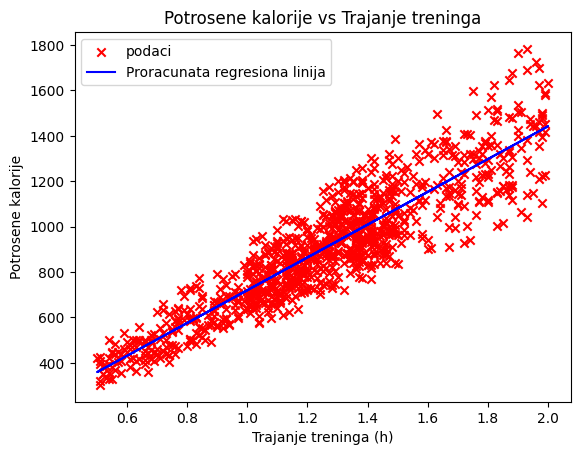

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,Male,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77
969,25,Male,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69
970,59,Female,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50
971,32,Male,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74


In [17]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import missingno as msno 

df = pd.read_csv(r"C:\Users\Jasmin\Desktop\Python\ML Projects\gym_members_exercise_tracking.csv")

x=df["Session_Duration (hours)"].values
y=df["Calories_Burned"].values
x_mean = np.mean(x)
y_mean = np.mean(y)
k=sum((x-x_mean)*(y-y_mean))/sum((x-x_mean)**2)
n = y_mean - k*x_mean

plt.scatter(x,y,color = 'red',marker ="x",label ="podaci")
plt.plot(x,k*x+n,color = 'blue',label="Proracunata regresiona linija")
plt.xlabel("Trajanje treninga (h)")
plt.ylabel("Potrosene kalorije")
plt.title("Potrosene kalorije vs Trajanje treninga")
plt.legend()
plt.show()
df

k = [721.78601591]
n = -1.4464588415315802


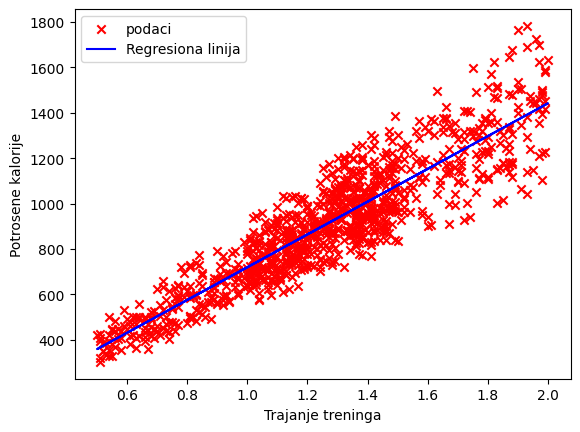

MSE : 13015.845619519223
R2 : 0.8247189416623428
Koliko kaloriaj bih potrzio za 2 h treninga: [1442.12557298]


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

df = pd.read_csv(r"C:\Users\Jasmin\Desktop\Python\ML Projects\gym_members_exercise_tracking.csv")
x=df['Session_Duration (hours)'].values
y = df['Calories_Burned'].values

X = x.reshape(-1,1)


model =LinearRegression()
model.fit(X,y)

print(f"k = {model.coef_}")
print(f"n = {model.intercept_}")

Y_predict = model.predict(X)

plt.scatter(X,y ,color = "red", marker="x",label = "podaci")
plt.plot(X,Y_predict,color ="blue",label = "Regresiona linija")
plt.xlabel("Trajanje treninga")
plt.ylabel("Potrosene kalorije")
plt.legend()
plt.show()

mse =mean_squared_error(y,Y_predict)
r2 = r2_score(y,Y_predict)

print(f"MSE : {mse}")
print(f"R2 : {r2}")

print(f"Koliko kaloriaj bih potrzio za 2 h treninga: {model.predict([[2]])}")

k = [-3.47763949e+00 -1.20772046e+00  1.17222340e+02  2.27244505e-02
  6.32290682e+00  5.11840851e-01  7.19334921e+02 -4.50040948e-01
  4.95957484e-02 -6.61666650e-01 -2.01090113e+00  4.10790033e+00
 -4.07900465e+01  4.07900465e+01  4.79350181e+00  7.90898357e+00
  4.90278710e+00]
n = -1013.228019692482
MSE = 1382.9996506021757
R2 = 0.9786313503246462


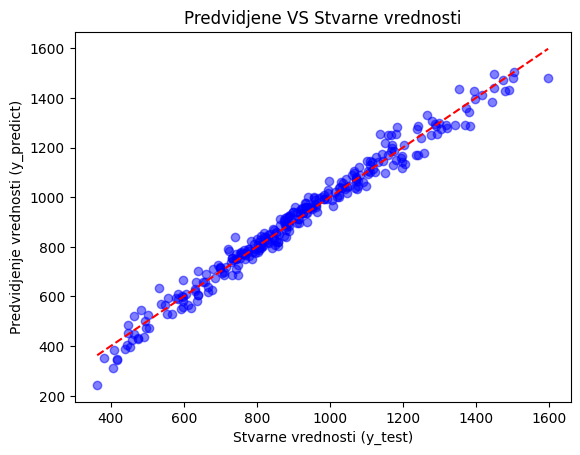

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as  plt 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split

df = pd.read_csv(r"C:\Users\Jasmin\Desktop\Python\ML Projects\gym_members_exercise_tracking.csv")

dummies = pd.get_dummies(df[['Gender','Workout_Type']]).astype(int)
merged = pd.concat([df,dummies],axis=1)
final = merged.drop(['Gender','Workout_Type',dummies.columns[-1]], axis = 1)
X = final.drop(columns=['Calories_Burned'])
Y = final['Calories_Burned']

X_train ,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=157)
X_train.shape
X_test.shape
model =LinearRegression()
model.fit(X_train,y_train)

print(f'k = {model.coef_}')
print(f'n = {model.intercept_}')

Y_predict = model.predict(X_test)
mse = mean_squared_error(y_test,Y_predict)
r2 = r2_score(y_test,Y_predict)

print(f"MSE = {mse}")
print(f"R2 = {r2}")

plt.scatter(y_test,Y_predict,color = 'blue',alpha = 0.5)
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color = 'red',linestyle = "dashed")
plt.xlabel("Stvarne vrednosti (y_test)")
plt.ylabel("Predvidjenje vrednosti (y_predict)")
plt.title("Predvidjene VS Stvarne vrednosti")
plt.show()
